# CS 457 - Homework Assignment 12: Time Series Analysis
## Name: Owais Waheed (ow07611)
### Email: ow07611@st.habib.edu.pk




In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
#reading the data
df = pd.read_csv("karachi-weather-2021-2023.csv", parse_dates=['datetime'])
df.set_index('datetime', inplace=True)
df.head()

,temp
datetime,
2021-01-01,15.0
2021-01-02,15.4
2021-01-03,15.6
2021-01-04,16.3
2021-01-05,17.1


# Question 01

In [3]:
# aggregating the data into weekly mean using function provided

weekly_mean = df.resample('W').mean()
weekly_mean.head()

,temp
datetime,
2021-01-03,15.333333
2021-01-10,16.028571
2021-01-17,17.085714
2021-01-24,19.457143
2021-01-31,17.800000


# Question 02

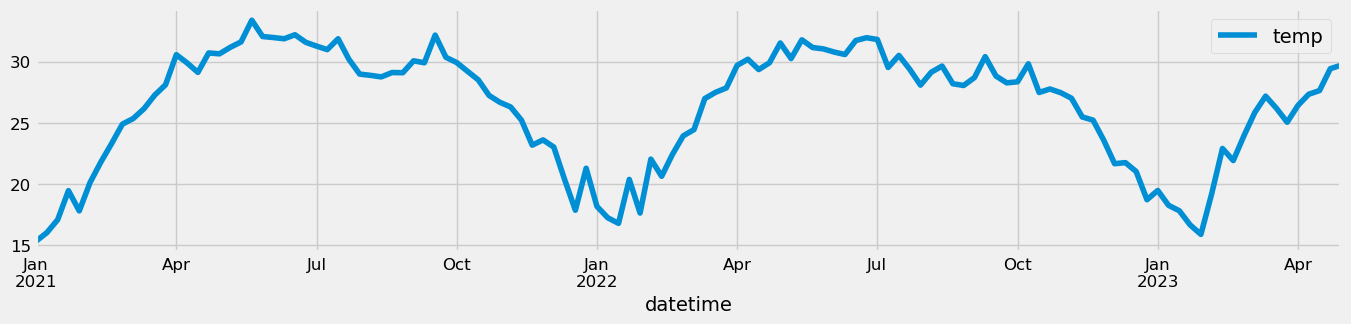

In [4]:
# Visualization of weekly mean.

weekly_mean.plot(figsize=(15, 3))
plt.show()

#### The graph highlights the average weekly temperature changes in Karachi from January 2021 to April 2023. It is observed that the temperature keeps changing alot throughout they year. The time period between Oct till April observes a significant drop in temperature whereas the temperature remain consistent from April till Oct which is the summer and moonsoon season. In summary, this plot is valuable tool for observing the changing trends in temperature of Karachi

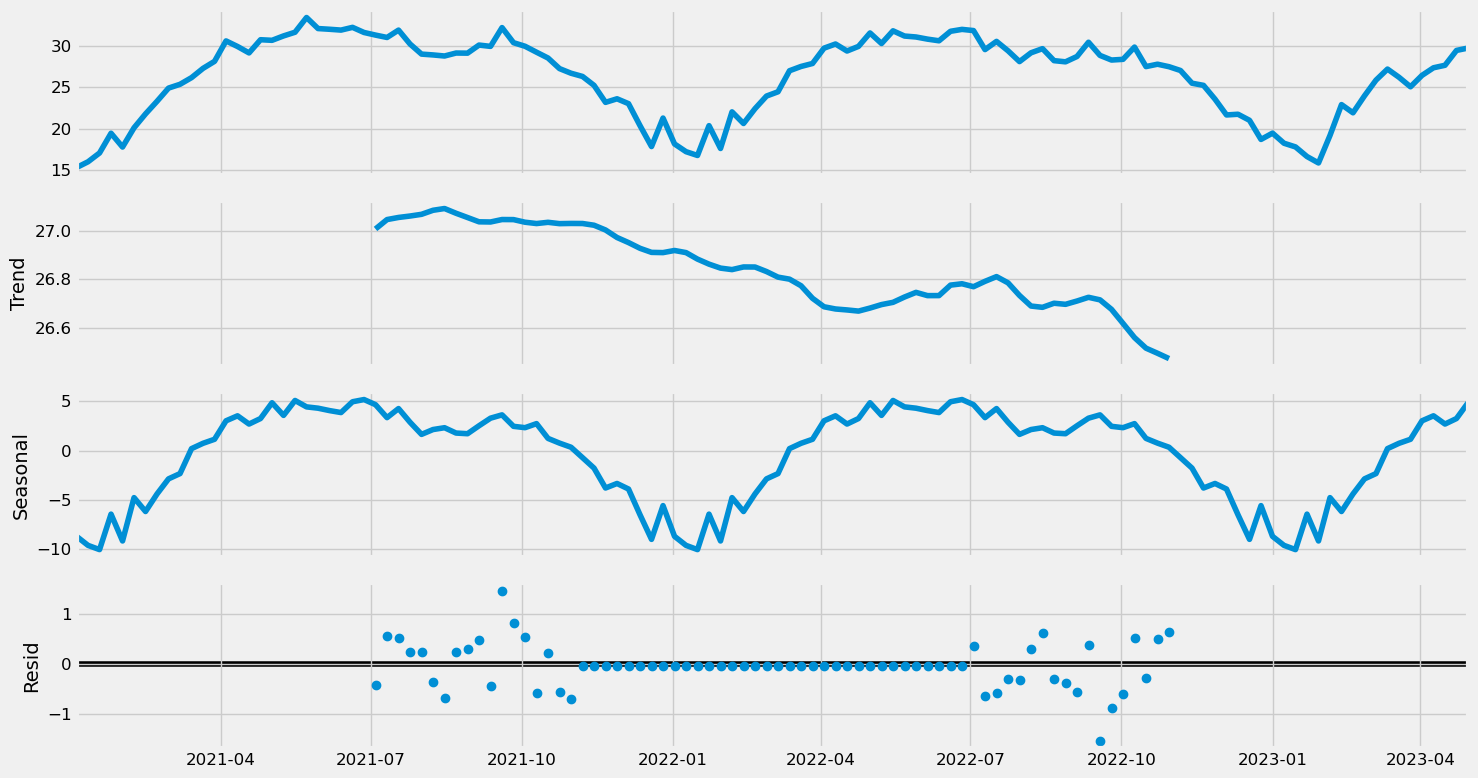

In [5]:
# visualization of the trend, seasonality and  residual

decomposition = sm.tsa.seasonal_decompose(weekly_mean, model='additive')
print(decomposition)
rcParams['figure.figsize'] = 15, 8
fig = decomposition.plot()
plt.show()

#### The decomposition consists of three different aspects i.e. Trend, Residual and and Seasonality which are shown in above visualization.

#### After looking at the trend visualization, we observe that there is a decrease in temperature in the last years. One reason might be the prolonged moonsoon seasons in Karachi as there are increased urban flooding in the city recently as compared to previous decade.

#### The second visualization shows seasonality. It suggests that temperatures tend to be higher than average most of the year and then there is a significant dropp in the graph during winters suggesting temperature gets lower for a short period of two to three months. Overall, this graph effectively shows the temperature trends in the city.

#### The third graph is of residual, which shows unexplained variations in temperature data not accounted for by the trend or seasonal components. It highlights points where temperatures differ significantly from expected trends, which could be due to external factors such as weather abnormalities or measurement errors in data. In essence, this graph offers information about the overall temperature variations.

# Question 3

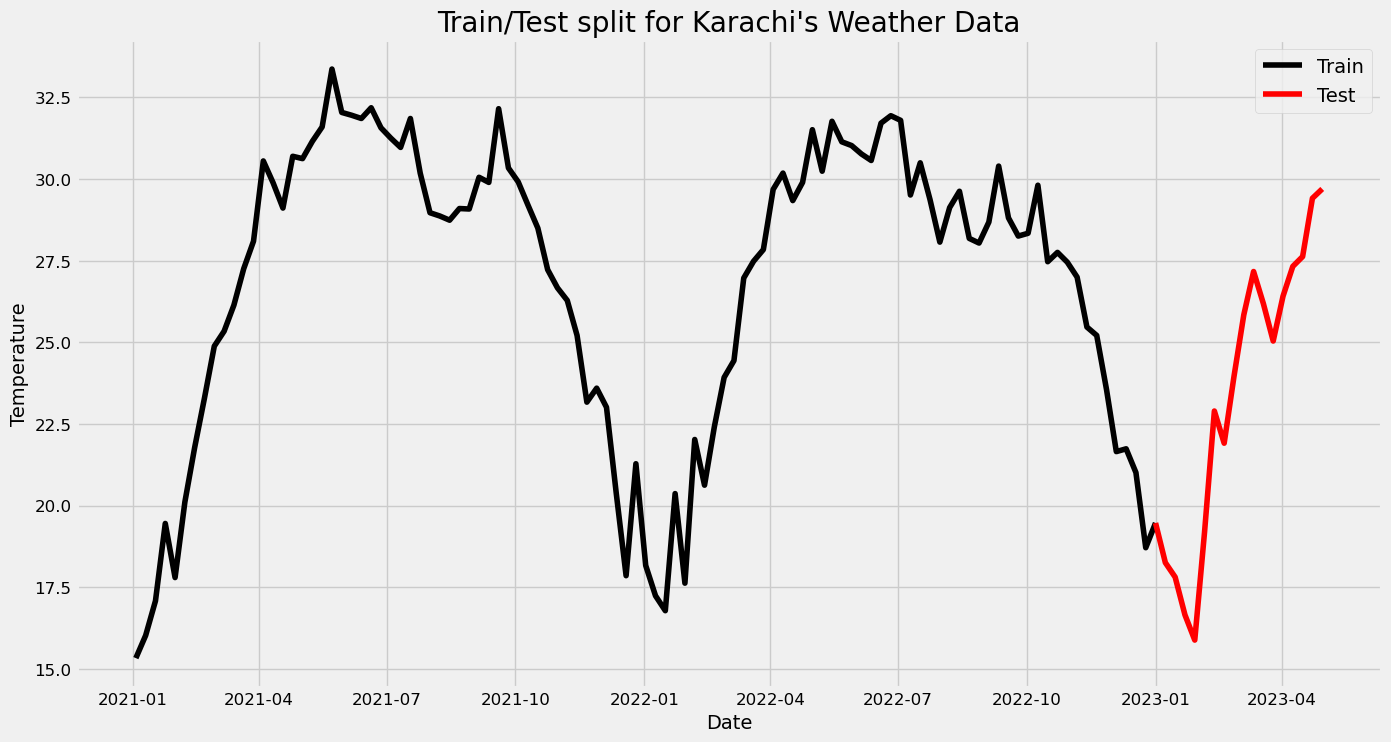

In [6]:
# Splitting the data into training and testing sets.
train = weekly_mean[weekly_mean.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
test = weekly_mean[weekly_mean.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

# Ploting the models

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Train/Test split for Karachi's Weather Data")
plt.legend()
plt.show()

#### The above graph shows our dataset. The black line shows the data in the training model and the red line depicts the data in the testing model.


# Question 4

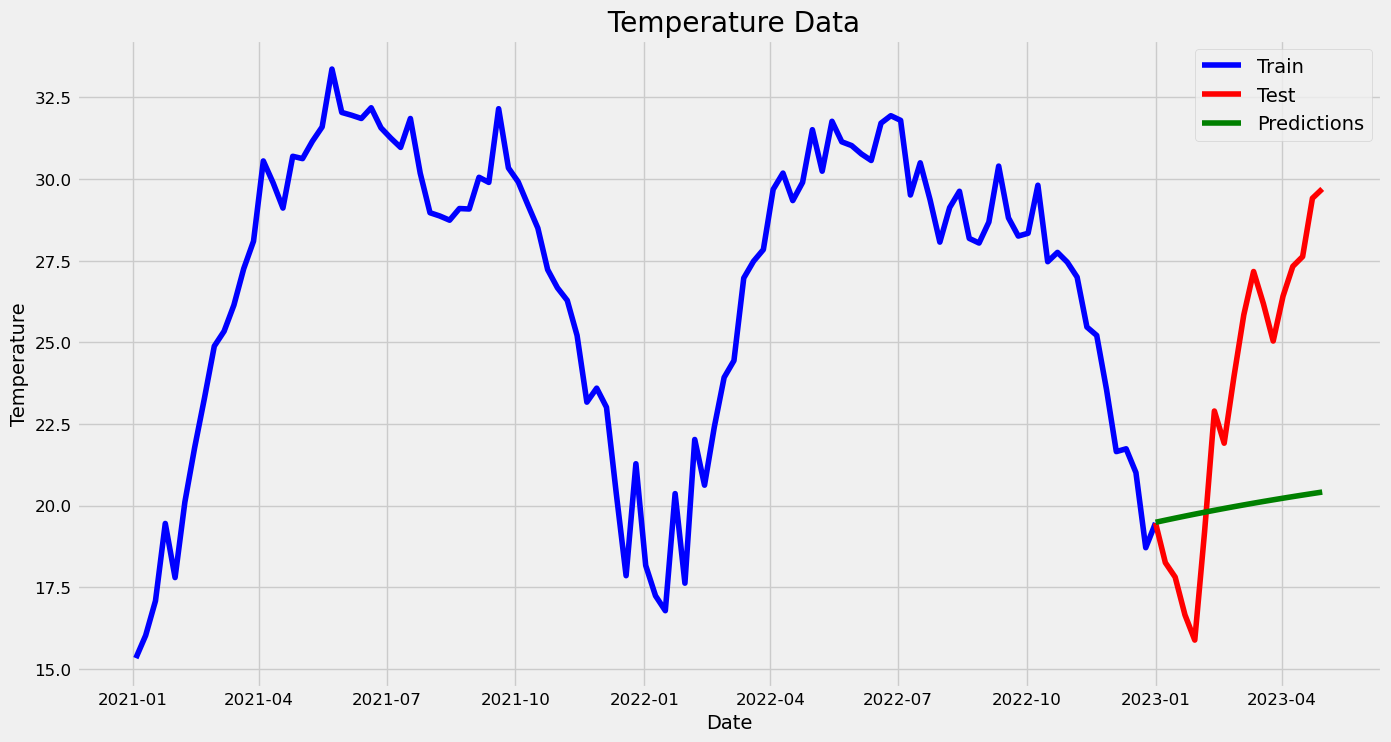

RMSE:  5.333699333578507


In [7]:


ARIMAmodel = ARIMA(train, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting 
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "blue", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title(" Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)


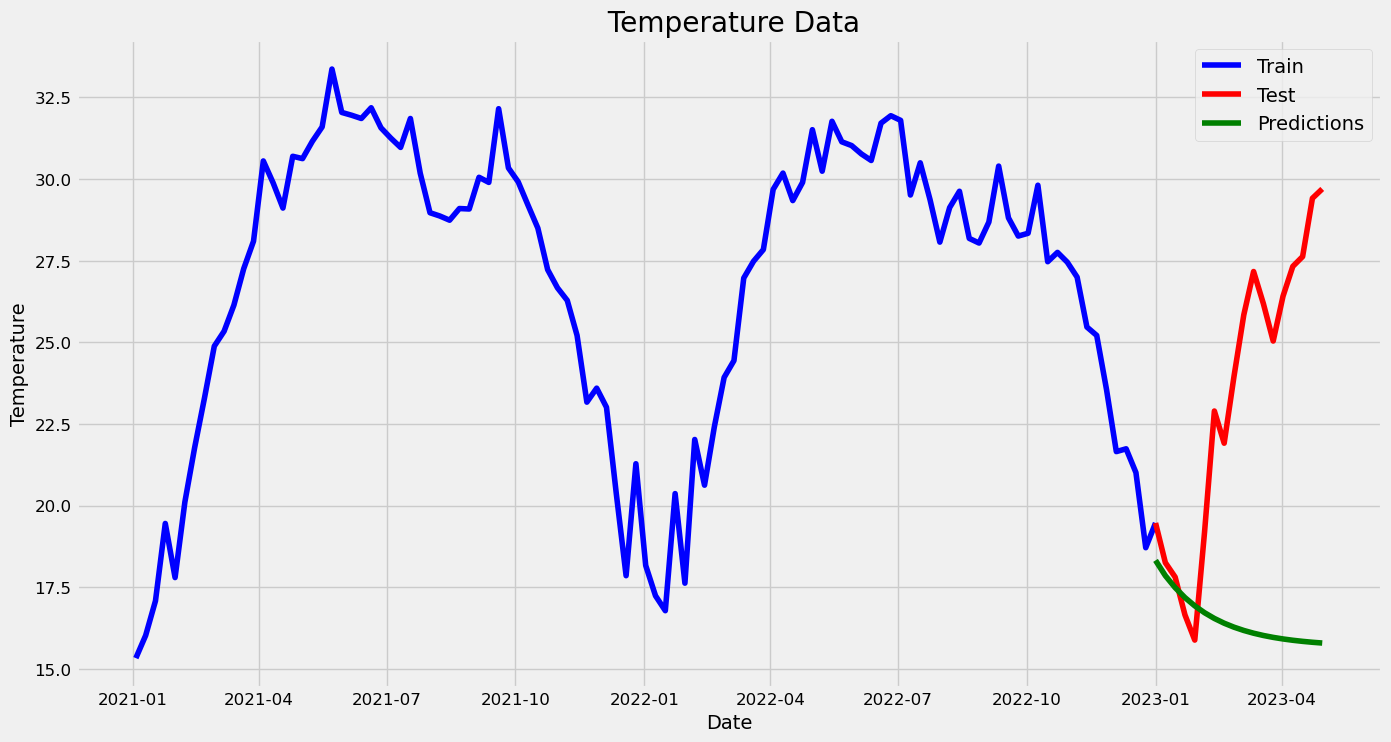

RMSE:  8.493310759608603


In [8]:

ARIMAmodel = ARIMA(train, order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting 
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "blue", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title(" Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

D:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


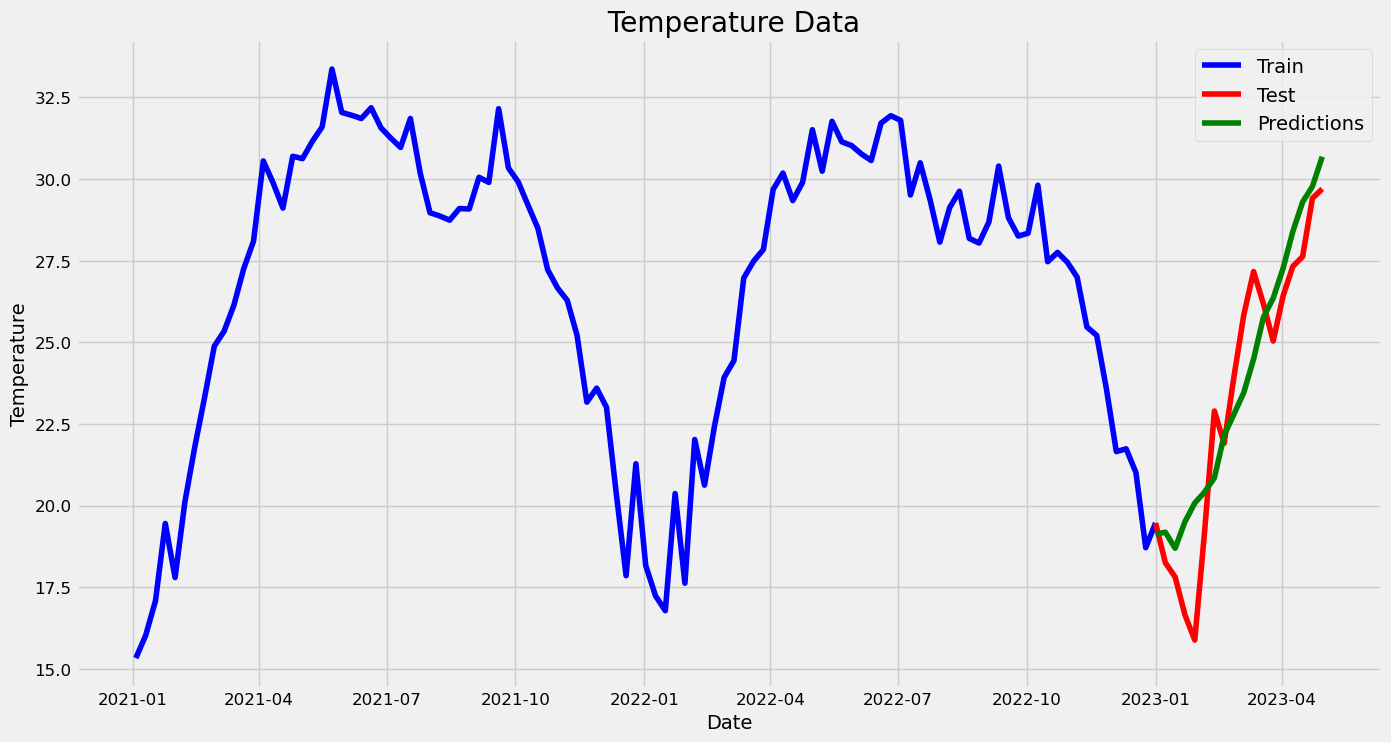

RMSE:  1.7489273827011804


In [17]:

ARIMAmodel = ARIMA(train, order = (6, 0, 6))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting 
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "blue", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title(" Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [10]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -185.835
Date:                Thu, 30 Nov 2023   AIC                            379.669
Time:                        23:58:46   BIC                            390.285
Sample:                    01-03-2021   HQIC                           383.971
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4693      3.881      5.790      0.000      14.863      30.075
ar.L1          0.9783      0.024     39.979      0.000       0.930       1.026
ma.L1         -0.1032      0.089     -1.163      0.2

####  Based on the provided graphs and RMSE values, the most effective ARIMA model is the one with the order (6, 0, 6), showcasing the lowest RMSE of 1.748. Another competitive model is the (2, 1, 2) order, yielding a respectable RMSE of 8.493. However, this model involves differencing the time series once, potentially leading to information loss.

#### In the context of the ARIMA model, an RMSE value of 1.748 indicates that the model's predictions differ from actual values by around 1.748 units on average. A lower RMSE suggests more accurate forecasts that closely match the actual values, whereas a higher RMSE shows less accuracy and a bigger departure from the actual values. As a result, the most accurate combination in the above is (6, 0, 6).

# Question 5

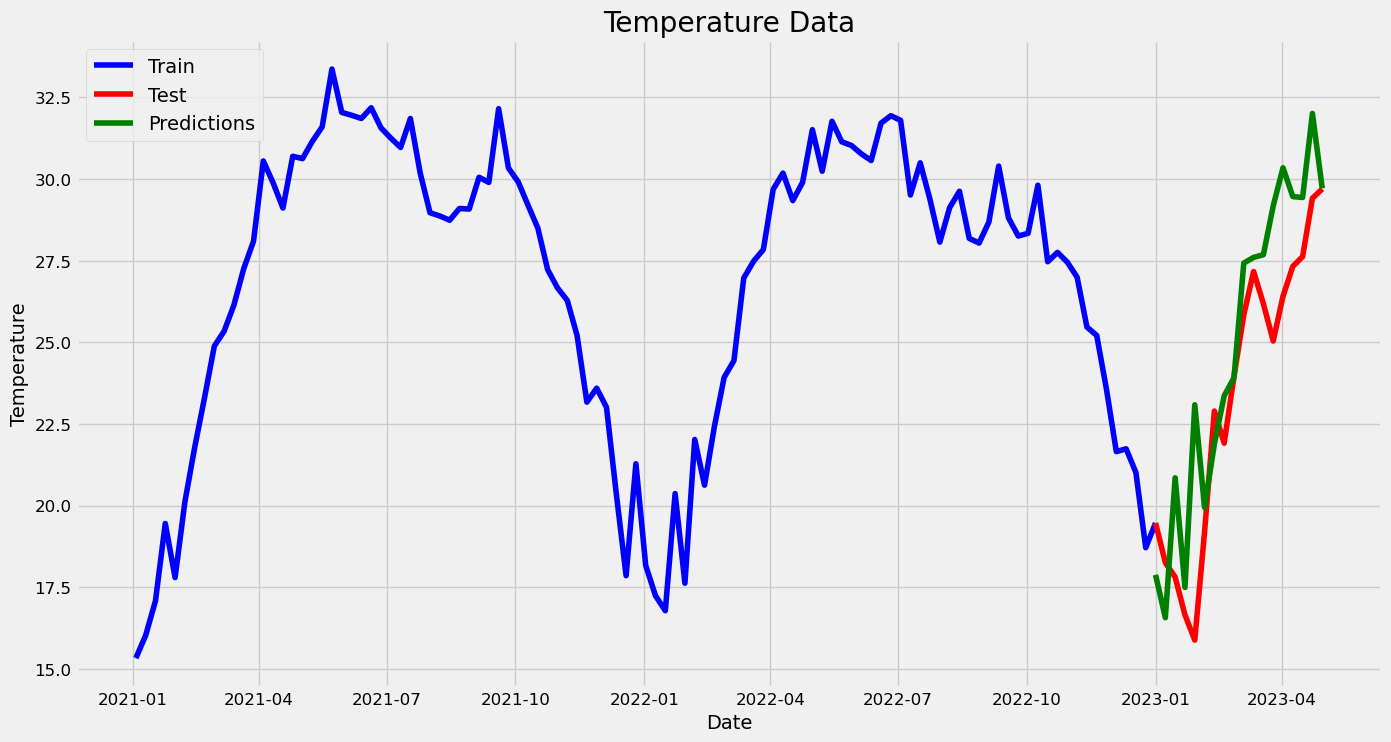

RMSE:  2.61459441681112
                                     SARIMAX Results                                      
Dep. Variable:                               temp   No. Observations:                  105
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 52)   Log Likelihood                 -87.095
Date:                            Fri, 01 Dec 2023   AIC                            184.189
Time:                                    00:03:45   BIC                            194.041
Sample:                                01-03-2021   HQIC                           187.978
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8650      0.362      2.389      0.017       0.155       1.575
ma.L1      

In [21]:
SARIMAXmodel = SARIMAX(train,order=(1, 0, 1),seasonal_order=(1, 1, 1, 52))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "blue", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

sarima_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",sarima_rmse)
print(SARIMAXmodel.summary())


####  A visualization of the model reveals the it's adeptness in capturing the overall trend and seasonality of the temperature data, effectively accommodating fluctuations and mitigating noise within the dataset. This is evidenced by the close alignment of the green line with the red line across the majority of plot regions. The calculated root mean square error (RMSE) value for the SARIMA model applied to the weather dataset stands at 2.614. A lower RMSE value implies accuracy and closeness of the model's predictions with the actual values. 


# Question  6

In [39]:


p = d = q = range(0, 2)
P = Q = D = range(1, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(P, D, Q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(1, 1, 1, 52)52 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 52)52 - AIC:8.0
ARIMA(0, 1, 0)x(1, 1, 1, 52)52 - AIC:6.0
ARIMA(0, 1, 1)x(1, 1, 1, 52)52 - AIC:8.0
ARIMA(1, 0, 0)x(1, 1, 1, 52)52 - AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 52)52 - AIC:10.0
ARIMA(1, 1, 0)x(1, 1, 1, 52)52 - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 52)52 - AIC:10.0


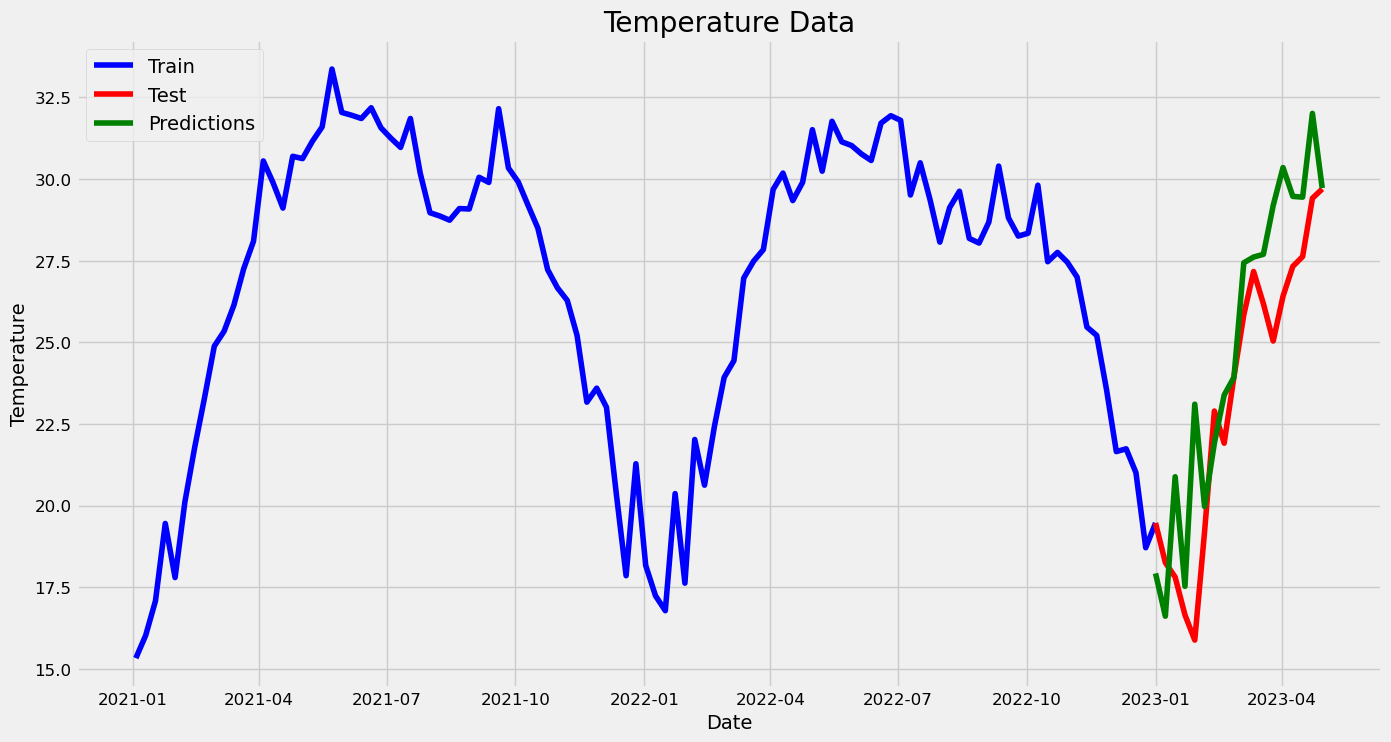

RMSE:  2.621090750869208
                                 SARIMAX Results                                  
Dep. Variable:                       temp   No. Observations:                  105
Model:             SARIMAX(1, 1, [1], 52)   Log Likelihood                 -88.316
Date:                    Fri, 01 Dec 2023   AIC                            182.633
Time:                            00:40:27   BIC                            188.544
Sample:                        01-03-2021   HQIC                           184.906
                             - 01-01-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52       0.3461   2.44e+05   1.42e-06      1.000   -4.78e+05    4.78e+05
ma.S.L52       0.3326   3.98e+05   8.35e-07      1.000   -7.81e+05    7.81

In [41]:
SARIMAXmodel = SARIMAX(train,order=(0, 0, 0),seasonal_order=(1, 1, 1, 52))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "blue", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

sarima_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",sarima_rmse)
print(SARIMAXmodel.summary())

#### The RMSE for the model is around 2.62, which is higher than the RMSE for the previous model. This indicates that the model is not a good fit for the data as compared to Arima. The predicted values are not too far to the actual values, and the model is effectively showing the trend and seasonal components of the time series data. However, based on accuracy of the model, I will not use it to predict the weather temperatures for Karachi.

### Comparitive Analysis:
####  The optimal paremeters of ARIMAX are (6,0,6) resulting in RMSE of 1.74<br> The optimal paremeters of SARIMAX are (0,0,0) resulting in RMSE of 2.62.<br> The ARIMA model clearly outperforms the SARIMA model in terms of RMSE and accuracy.<br> The ARIMA model is a better fit for the data as compared to the SARIMA model.<br> However it was extremely challenging to find the optimal parameters for the models as the cpu was taking so much time calculating when the parameters exceeded the value of 3 and it started throwing errors

# Question 7.

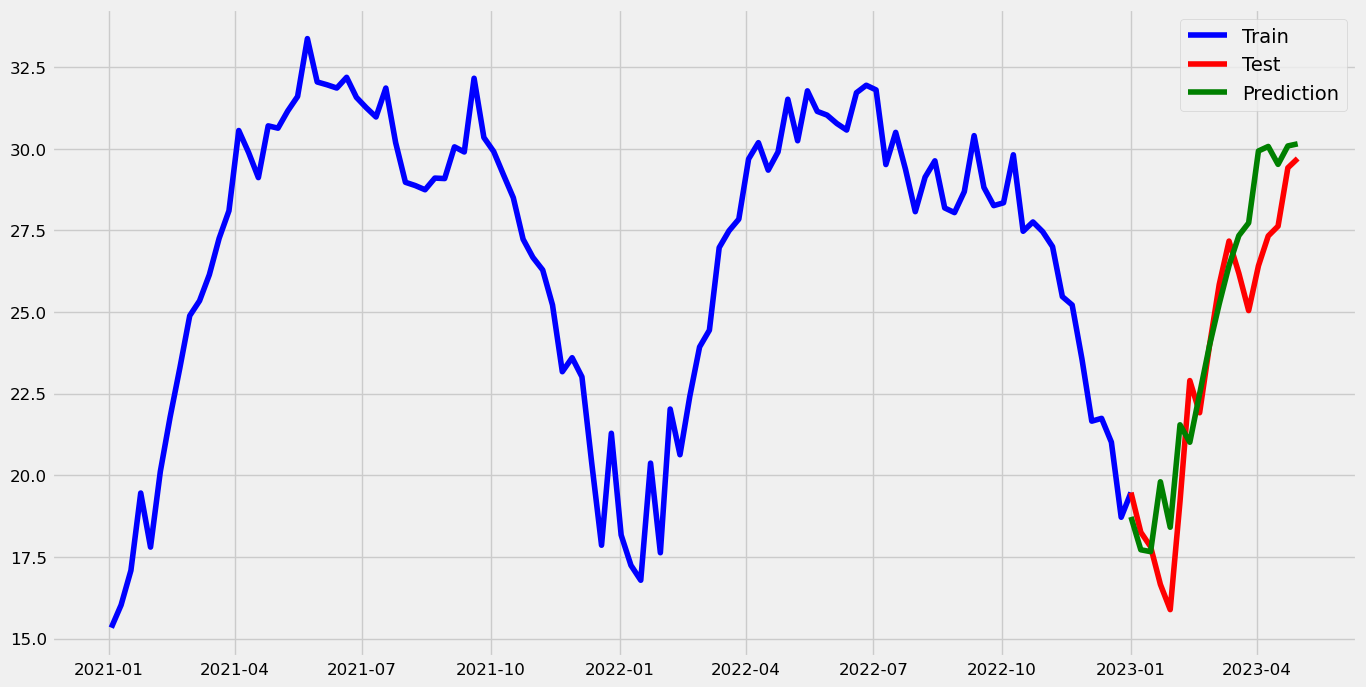

RMSE:  1.8267456106286817


In [44]:
#I will be using the Random Forest Regression


#extracting the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
#converting data into one matrix
trainX = np.array([day, months, years]).T
trainY = train.values

#extracting the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
 
#converting data into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.values

#Using the Random Forest Regression

# fitting the model
rfmodel = RandomForestRegressor()
rfmodel.fit(trainX,trainY)
 
# predicting on the same period
preds = rfmodel.predict(testX)
 
# plotting the new model
plt.plot(train.index, train.values,color="blue", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()

rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)


#### The RMSE value of this model is 1.826 which is considered a lower value and it tells that the model is capable of depicting the trends in temperature. We can see that the green and red lines overlaps mostly so this alignment serves as an indication that the regression model is performing effectively, generating accurate predictions.

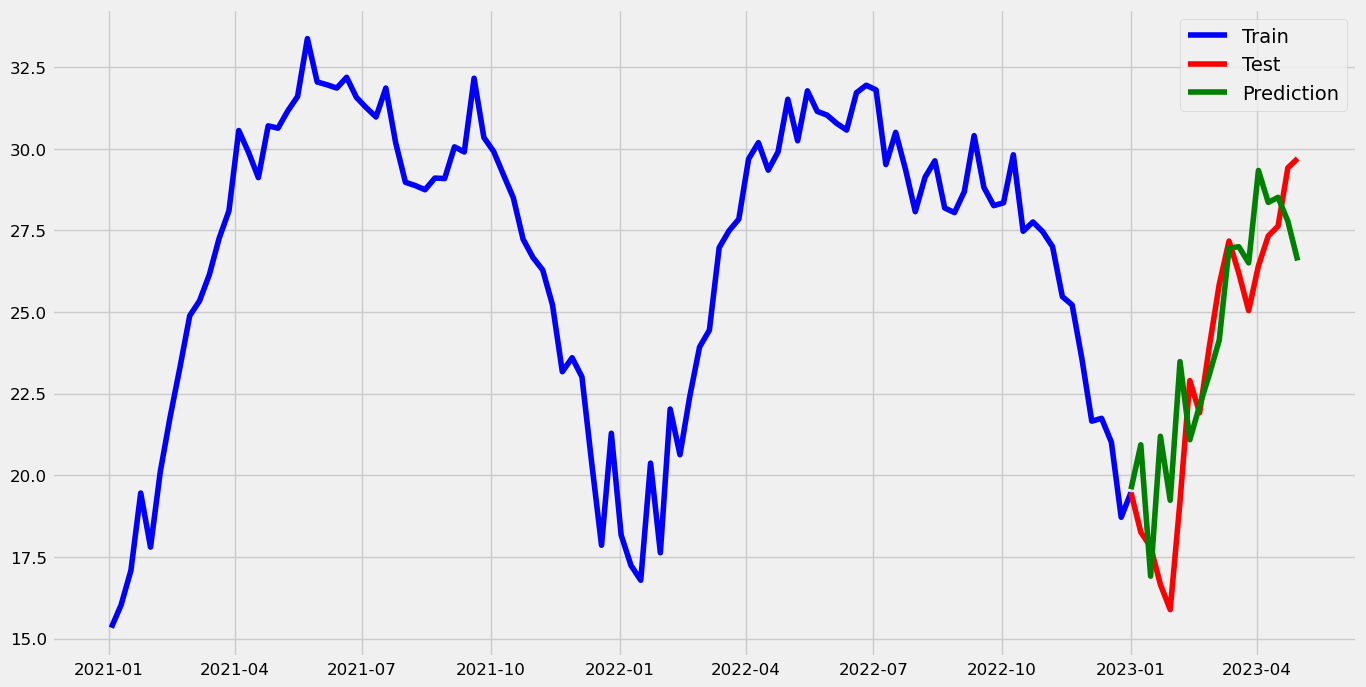

RMSE:  2.2452497576659773


In [46]:
#Using Support Vector Regression

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(trainX, trainY)

preds = svr.predict(testX)

#plotting what has been learned
plt.plot(train.index, train.values,color="blue", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()

rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

#### The RMSE value of this model is 2.24 which is a moderate value and it tells that the model is capable of depicting the trends in temperature but it will deviate more than our previous model. We can see that the green and red lines overlaps for a shorter period so this alignment serves as an indication that the regression model is not efficient in generating accurate predictions.

# Question 8

### RMSE Comparison of Time Series Models

| Model                    | RMSE   |
|--------------------------|--------|
| ARIMA                    | 1.74   |
| SARIMA                   | 2.62   |
| SVR (Support Vector Reg.)| 2.24   |
| Random Forest Regression | 1.826  |

1. **ARIMA (1.74 RMSE):**
   - ARIMA achieved the lowest RMSE, indicating superior accuracy in predicting time series data.
   - Well-suited for capturing trends and seasonality in stationary time series.

2. **SARIMA (2.62 RMSE):**
   - SARIMA exhibited a higher RMSE compared to ARIMA, suggesting potential limitations in capturing underlying patterns.
   - Designed to handle seasonality, but sensitivity to parameter tuning may impact performance.

3. **SVR (2.24 RMSE):**
   - Support Vector Regression (SVR) showed moderate RMSE, placing it between ARIMA and SARIMA.
   - Capable of capturing complex patterns, with performance influenced by kernel and hyperparameter choices.

4. **Random Forest Regression (1.826 RMSE):**
   - Random Forest Regression performed well with a relatively low RMSE, indicating strong predictive capability.
   - Versatile model effective in handling non-linearity and interactions in the data.

#### Conclusion:
- ARIMA and Random Forest Regression demonstrated superior performance with lower RMSE values.The choice between them may depend on specific dataset characteristics and forecasting requirements. we should consider factors such as interpretability, computational efficiency, and further tuning for optimization.

# Question 9 , 10 , 11


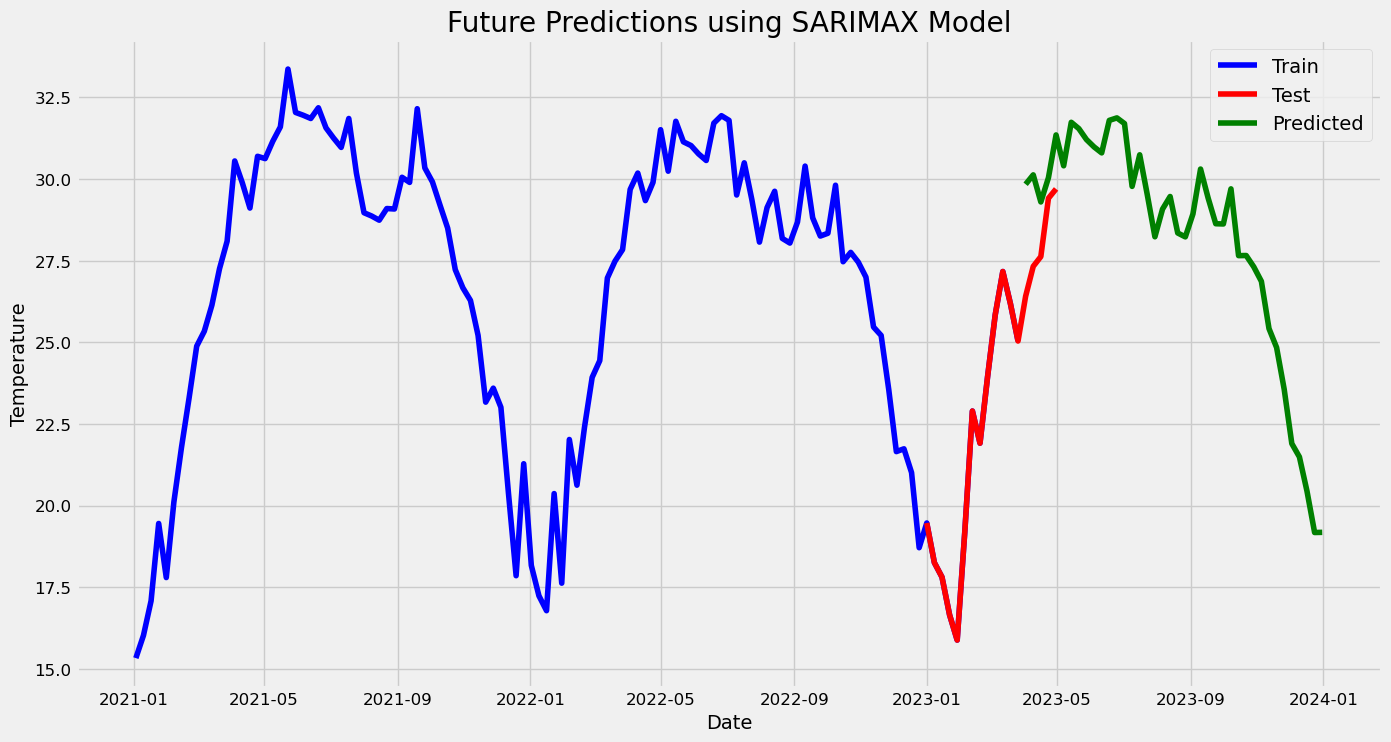

In [63]:
#create a data range for future predictions
future = pd.date_range(start='04/01/2023', end='12/31/2023', freq='W')

#fitting the SARIMA model
SARIMAXmodelNEW = SARIMAX(train, order=(0,0,0), seasonal_order=(1,1,1,52))
SARIMAXmodelNEW = SARIMAXmodelNEW.fit()

#making predictions
yPred = SARIMAXmodelNEW.get_forecast(len(future))
yPred_df_train = yPred.conf_int(alpha=0.05)

#adding predictions to dataframe
yPred_df_train['Predictions'] = SARIMAXmodelNEW.predict(start=yPred_df_train.index[0], end=yPred_df_train.index[-1])

#setting index to datetime
yPred_df_train.index = future

#extracting predictions
yPred_df_train_out = yPred_df_train['Predictions']

#plotting the train, test and predicted data

plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='red')
plt.plot(yPred_df_train_out, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Future Predictions using SARIMAX Model')
plt.legend()
plt.show()

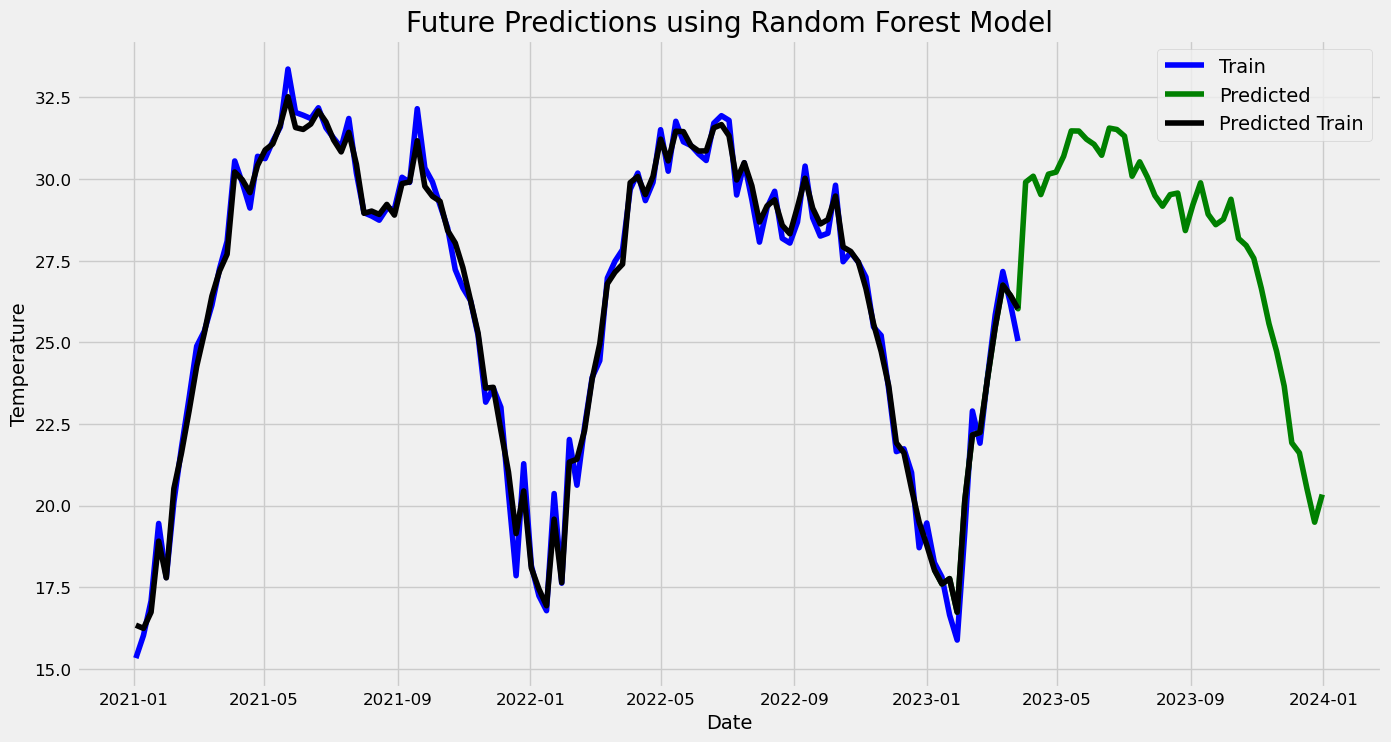

In [65]:
#create a data range for future predictions
futureML = pd.date_range(start='01/04/2023', end='31/12/2023', freq='W')

#extract the day, month, year from the future data
months = [x.month for x in futureML]
years = [x.year for x in futureML]
days = [x.day for x in futureML]

#convert into one matrix
X_test2 = np.array([days, months, years]).T
Y_test2 = futureML.values

#extract the day, month, year from the train data
months_train = [x.month for x in train.index]
years_train = [x.year for x in train.index]
days_train = [x.day for x in train.index]

#convert into one matrix
X_train2 = np.array([days_train, months_train, years_train]).T
Y_train2 = train.values

#fitting the random forest model
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train2, Y_train2)

#predicting the values
preds_train = rfmodel.predict(X_train2)

preds = rfmodel.predict(X_test2)

#plotting the train, test and predicted data
plt.plot(train.index, train.values, label='Train', color='blue')
plt.plot(futureML, preds, label='Predicted', color='green')
plt.plot(train.index, preds_train, label='Predicted Train', color='black')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Future Predictions using Random Forest Model')
plt.legend()
plt.show()


#### The SARIMAX model's graph indicates a clear seasonal trend, capturing the temperature variability expected in Karachi's climate. The model's predictive line shows an upward trend as it approaches the summer months, mirroring the training data's seasonality. This suggests that SARIMAX could be incorporating the seasonal component effectively.

#### On the other hand, the Random Forest Regressor's graph reflects a more detailed replication of the training data's fluctuations. It predicts the temperature with a higher resolution, capturing the intricate variations that a model like SARIMAX might smooth over.

#### Comparing the two, SARIMAX provides a general trend which is useful for capturing the broad patterns, while the Random Forest offers a granular forecast, potentially more accurate at capturing week-by-week variations. The differences may stem from the models' inherent characteristics—SARIMAX for macro-level trends and Random Forest for detailed, micro-level patterns.